## Unzip and Split Dataset

In [8]:
!unzip '/content/drive/MyDrive/ibm/Copy of Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/ibm/Copy of Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders

splitfolders.ratio('/content/flowers', output='flowers_split', seed=1337, ratio=(0.75, 0, 0.25))

Copying files: 4317 files [00:00, 4811.16 files/s]


## Image Augmentation

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
xtrain = train_datagen.flow_from_directory('/content/flowers_split/train',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 3237 images belonging to 5 classes.


In [15]:
xtest = test_datagen.flow_from_directory('/content/flowers_split/test',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 1080 images belonging to 5 classes.


## Create Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [27]:
model = Sequential()

## Add Layers

In [28]:
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Fully Connected Layers (ANN)

model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))

# Output Layer

model.add(Dense(5, activation='softmax'))

## Complie Model

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model

In [31]:
  model.fit_generator(xtrain, steps_per_epoch=len(xtrain), epochs=50, validation_data=xtest, validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
33/33 [==============================] - 13s 381ms/step - loss: 1.8899 - accuracy: 0.3167 - val_loss: 1.3698 - val_accuracy: 0.3787
Epoch 2/50
33/33 [==============================] - 12s 368ms/step - loss: 1.2094 - accuracy: 0.4801 - val_loss: 1.2368 - val_accuracy: 0.5009
Epoch 3/50
33/33 [==============================] - 12s 364ms/step - loss: 1.0973 - accuracy: 0.5607 - val_loss: 1.1651 - val_accuracy: 0.5389
Epoch 4/50
33/33 [==============================] - 12s 367ms/step - loss: 1.0167 - accuracy: 0.6077 - val_loss: 1.0893 - val_accuracy: 0.5833
Epoch 5/50
33/33 [==============================] - 12s 368ms/step - loss: 0.9562 - accuracy: 0.6333 - val_loss: 1.1085 - val_accuracy: 0.5926
Epoch 6/50
33/33 [==============================] - 12s 366ms/step - loss: 0.9263 - accuracy: 0.6454 - val_loss: 1.0354 - val_accuracy: 0.6204
Epoch 7/50
33/33 [==============================] - 13s 408ms/step - loss: 0.8685 - accuracy: 0.6701 - val_loss: 1.0097 - val_accuracy: 0.6241

## Save Model

In [32]:
model.save('flowers.h5')

## Test Model

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [45]:
# Load Image

img = image.load_img('/content/flowers_split/train/tulip/13979840624_28466cb3ec_n.jpg', target_size=(64,64))

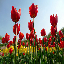

In [46]:
img

In [47]:
# Converting Image to Array

imgToArray = image.img_to_array(img)

In [48]:
# Expanding Dimension

imgToArray = np.expand_dims(imgToArray, axis=0)

In [49]:
model.predict(imgToArray)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [50]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [51]:
output = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'  ]
predict = np.argmax(model.predict(imgToArray))
output[predict]

'tulip'